In [1]:
# Loading the IMDB dataset
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/dados/anaconda3/lib/python3.8/site-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/dados/anaconda3/lib/python3.8/site-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'd

In [2]:
train_data[0][:15]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4]

In [3]:
train_labels[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
dict(list(reverse_word_index.items())[:5])

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani'}

In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
# Encoding the integer sequences into a binary matrix
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [10]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
# also vectorize your labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [14]:
# The model definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model

In [15]:
# Compiling the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
import keras
keras.__version__

'2.5.0'

In [17]:
import tensorflow
tensorflow.__version__

'2.5.0'

In [18]:
from tensorflow import keras
keras.optimizers.RMSprop()

In [19]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [20]:
%%time

# Training your model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 10s 24ms/step - loss: 0.5877 - acc: 0.6896 - val_loss: 0.3838 - val_acc: 0.8538
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.3022 - acc: 0.9128 - val_loss: 0.3186 - val_acc: 0.8772
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2213 - acc: 0.9323 - val_loss: 0.3095 - val_acc: 0.8739
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1715 - acc: 0.9485 - val_loss: 0.2768 - val_acc: 0.8883
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1395 - acc: 0.9585 - val_loss: 0.3052 - val_acc: 0.8816
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1205 - acc: 0.9650 - val_loss: 0.2977 - val_acc: 0.8865
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0968 - acc: 0.9727 - val_loss: 0.3085 - val_acc: 0.8847
Epoch 8/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0774 - acc: 0.

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

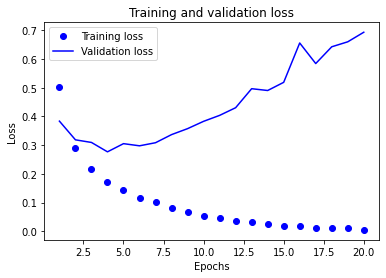

In [22]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

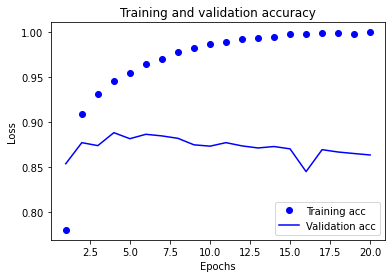

In [23]:
# Plotting the training and validation accuracy
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
%%time 

# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print("=> loss: %.4f - accuracy: %.4f" % (results[0], results[1]))

Epoch 1/4
49/49 [==============================] - 1s 6ms/step - loss: 0.5381 - accuracy: 0.7382
Epoch 2/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2666 - accuracy: 0.9063
Epoch 3/4
49/49 [==============================] - 0s 6ms/step - loss: 0.1924 - accuracy: 0.9338
Epoch 4/4
782/782 [==============================] - 1s 650us/step - loss: 0.3232 - accuracy: 0.8734
=> loss: 0.3232 - accuracy: 0.8734
CPU times: user 12.4 s, sys: 1.06 s, total: 13.4 s
Wall time: 3.39 s


In [25]:
# Using a trained network to generate predictions on new data
model.predict(x_test)

array([[0.15593082],
       [0.9994471 ],
       [0.51497513],
       ...,
       [0.0945797 ],
       [0.03393018],
       [0.4354121 ]], dtype=float32)